In [2]:
import matplotlib.pyplot as plt
import numpy as np

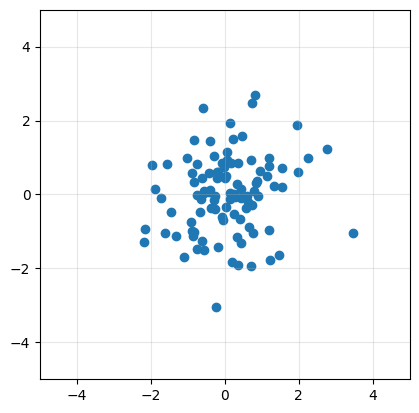

In [3]:
# Create some normally distributed points

n = 100
xs = np.random.randn(n)
ys = np.random.randn(n)
norm_xys = np.stack((xs, ys))

plt.scatter(norm_xys[0], norm_xys[1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
ax = plt.gca()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')
plt.show()

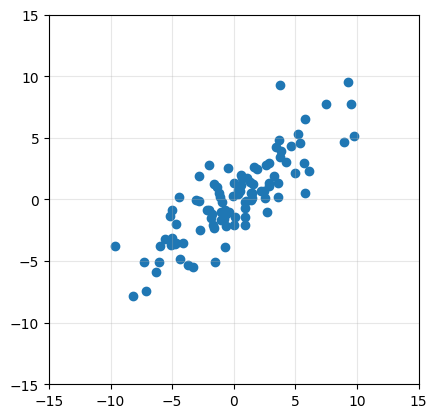

In [4]:
# Scale the points by a covariance transform

transform = np.array([
    [2, 3],
    [3, 1]
])
xys = transform @ norm_xys

plt.scatter(xys[0], xys[1])
plt.xlim(-15, 15)
plt.ylim(-15, 15)
ax = plt.gca()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')
plt.show()

In [5]:
# Now that we have a nice cloud of points, let's start PCA!

In [6]:
# First, lets calculate the covariance matrix of the data
#   - We need var(x), var(y) and cov(x, y)
#   - The covariance matrix will be C = [[var(x), cov(x, y)], [cov(y, x), var(y)]]
#       - cov(y, x) = cov(x, y)

mean_xy = np.mean(xys, axis=1)

delta_x = xys[0] - mean_xy[0]
delta_y = xys[1] - mean_xy[1]

var_x = np.sum(delta_x**2) / (n - 1)
var_y = np.sum(delta_y**2) / (n - 1)
cov_xy = np.sum(delta_x * delta_y) / (n - 1)

cov = np.array([
    [var_x, cov_xy],
    [cov_xy, var_y]
])
print(cov)

# Check our results against numpy's cov()
print("Covariance matrix correct? ->", np.allclose(cov, np.cov(xys)))

[[15.91487544 11.18998527]
 [11.18998527 11.22644175]]
Covariance matrix correct? -> True


PC1: [0.77622206 0.6304596 ] 	 Variance: 25.00355511816156
PC2: [-0.6304596   0.77622206] 	 Variance: 2.13776207388795
Dot product: 0.0


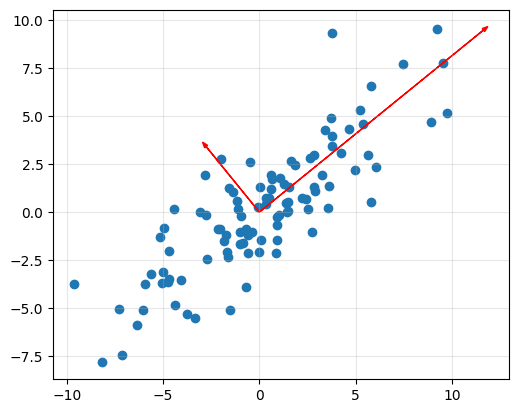

Eigenvalues correct? -> True
Eigenvectors correct? -> True


In [7]:
# Now, lets find the eigenvalues and eigenvectors of the covariance matrix
#   - The eigenvectors are the principal components
#       - Because the covariance matrix is symmetric, the eigenvectors will be orthogonal
#   - The eigenvalues represent the variance along the principal components
#       - Likewise, the square root of the eigenvalues represent the standard deviation along the principal components

eig_result = np.linalg.eig(cov) # QR decomposition algorithm
eig_vals = eig_result.eigenvalues
eig_vecs = eig_result.eigenvectors.T

pc1 = eig_vecs[0]
pc2 = eig_vecs[1]

scale = 3 # number of standard deviations
scaled_pc1 = scale * np.sqrt(eig_vals[0]) * pc1
scaled_pc2 = scale * np.sqrt(eig_vals[1]) * pc2

print("PC1:", pc1, "\t Variance:", eig_vals[0])
print("PC2:", pc2, "\t Variance:", eig_vals[1])
print("Dot product:", np.dot(pc1, pc2)) # eigenvectors should be orthogonal

plt.scatter(xys[0], xys[1])
plt.arrow(0, 0, scaled_pc1[0], scaled_pc1[1], head_width=0.2, head_length=0.3, color='r')
plt.arrow(0, 0, scaled_pc2[0], scaled_pc2[1], head_width=0.2, head_length=0.3, color='r')
ax = plt.gca()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')
plt.show()

# Check our results against scikit-learn's PCA()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(xys.T)
print("Eigenvalues correct? ->", np.allclose(eig_vals, pca.explained_variance_)) # eigenvalues
print("Eigenvectors correct? ->", np.allclose(eig_vecs, pca.components_)) # eigenvectors

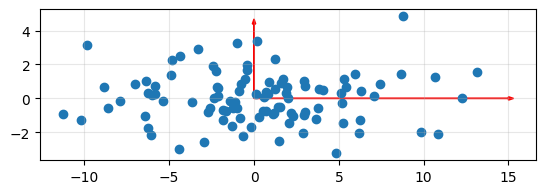

In [8]:
# Finally, lets project the data onto our principal components (eigenvectors)
#   - The intuition for how to do this comes from diagonalization: A = PDP^-1
#       - P^-1 represents a rotation from the standard basis to the eigenbasis
#       - D represents a scaling in the eigenbasis
#       - P represents a rotation from the eigenbasis back to the standard basis
#   - So if we just apply P^-1, we get the projection to the eigenbasis we're looking for
#       - Because P is composed of the eigenvectors and the eigenvectors are orthogonal, P is an orthogonal matrix
#       - This means P^-1 is simply P^T

p_xys = eig_result.eigenvectors.T @ xys # rotate onto the eigenbasis

p_scale = 3 # number of standard deviations
p_scaled_pc1 = p_scale * np.sqrt(eig_vals[0]) * np.array([1, 0])
p_scaled_pc2 = p_scale * np.sqrt(eig_vals[1]) * np.array([0, 1])

plt.arrow(0, 0, p_scaled_pc1[0], p_scaled_pc1[1], head_width=0.2, head_length=0.3, color='r')
plt.arrow(0, 0, p_scaled_pc2[0], p_scaled_pc2[1], head_width=0.2, head_length=0.3, color='r')
plt.scatter(p_xys[0], p_xys[1])
ax = plt.gca()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal', adjustable='box')
plt.show()